# Example notebook for the measure station classes

Currently there are 4 subclasses which inherit and extend the functionality of the base `station` class, which are `RiverLevel` , `RiverFlow`, `TidalLevel` and `Temperature`. Each of these classes are intialised in a simlar way to station with the exception that they only store a subset of the measures available at a station which are releveant to that particular station type. 

## `TidalLevel` 

In [4]:
from flood_monitoring import TidalLevel, station 

In [5]:
tidal_level_station = TidalLevel('E70024') 
station = station('E70024') 

## Accessing `TidalLevel` attributes 

Accessing all of the attributes using `vars`

In [6]:
vars(tidal_level_station)

{'station_id': 'E70024',
 'parameter': 'level',
 'qualifier': ['Tidal Level'],
 'measure_type': 'Tidal Level',
 '_station__lat': 52.47311,
 '_station__long': 1.75011,
 '_station__in_flood': False,
 'measures': [{'qualifier': 'Tidal Level',
   'units': 'm',
   'value_type': 'mean',
   'notation': 'E70024-level-tidal_level-Mean-15_min-m'}],
 'data': [1.524],
 'timestamps': ['2025-05-21T19:45:00Z']}

Here we can see that our `TidalLevel` object stores all of the same attributes when compared to the base `station` object, with the only difference being that our `TidalLevel` object will only store measures related to the tidal level and a `station` object may measure the tidal level, temperature etc. 

##  calling methods inherited from `station` 

TidalLevel inherts 3 methods from the base `station` class which are `get_latest_measurement`, `plot_data()` and `plot_data_range()` which are all described in the `station` class notebook. 

###  `get_latest_measurement()` 

Get latest measurement will retrieve all the latest measurement for all measures stored inside of `station.measures` 

In [7]:
tidal_level_station.get_latest_measurement() 

{'E70024-level-tidal_level-Mean-15_min-m': 1.524}

Here we can see it prints the measures notation as well its most recent value. 

### `plot_data` 

`plot_data`  draws from the `measures`, `timestamps`, `values` attributes of our `station` object. So it essentially plots all of the measures with non null values for each of the stations measures at the time of its initialisation, this can be seen as above `get_latest_measures` returns a dictionary with 2 meausres but given that one of them had a reading of `None` we exclude it from plotting 

/var/folders/2b/758fcv4x1db1n7sbf0zmpkpw0000gn/T/ipykernel_75378/4251961421.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show();


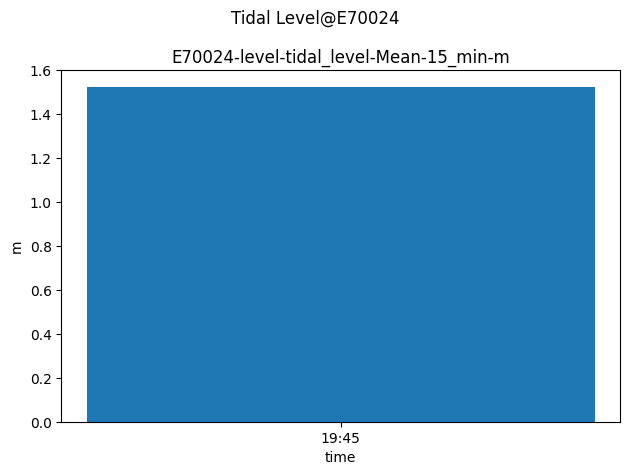

In [8]:
fig, ax = tidal_level_station.plot_data() 

fig.show(); 

When comparing this plot to th equiavlent plot we can see that the station type which is `Tidal Level` is listed at the botm which is missing for the generic station object. 

### `plot_data_range()`

`plot_data_range()` unlike `plot_data()` actually requests information from the api. It retrieves all readings for all of the measures defined in  `station.measures` over the date range specified. Similar to `plot_data()` we only plot measuers with readings available and if no readings are available then an error will be raised. 

/var/folders/2b/758fcv4x1db1n7sbf0zmpkpw0000gn/T/ipykernel_75378/2198324366.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show();


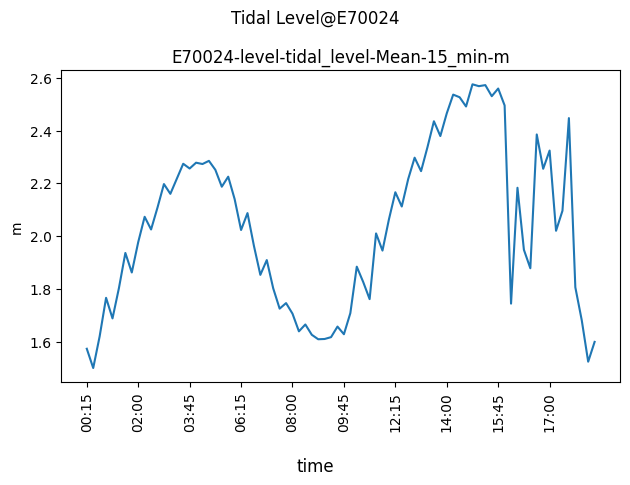

In [9]:
fig, ax = tidal_level_station.plot_data_range() 
fig.tight_layout() 
fig.show(); 

Similar to `plot_data` the only difference between callling `plot_data_range()` with the generic station object and a particular measures tation subclass is that the the stations measure is printed at the top inside of the title. 

## calling measure station specific methods 

### `calculate_tidal_range()` 

this is a method which extends the functionality of the `TidalLevel` station class, it takes in one optional arguement which is a date range which you wish the tidal range to be calculated over if this is not provided then the tidal range for the current day will be calculated. 

calculating the tidal range for the current day 

In [10]:
tidal_level_station.calculate_tidal_range() 

1.08

In [11]:
tidal_level_station.calculate_tidal_range(('2025-05-10', '2025-05-16'))

1.84

### `average_temp()`

This is a method which extends the functionality of the `Temperature` station class, similar to `calculate_tidal_range()` it takes one optional argumenet which is a date range and if this not specificed then the default date range is simply the current day

Initialising a temperature station object 

In [1]:
from flood_monitoring import Temperature

In [2]:
temperature_station=Temperature('1412') 

calculating the average temperature for the current day 

In [3]:
temperature_station.average_temp() 

-0.34

calculating the average temperature over a date range 

In [ ]:
temperature_station.average_temp(('2025-05-14', '2025-05-17')) 